In [79]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import acquire
import prep
import split_scale

import warnings
warnings.filterwarnings("ignore")

### Acquire

Pull single unit properties with transactions in 2017 from sql

In [2]:
df = pd.read_csv(r'/Users/mists/codeup-data-science/zillow-cluster/query_result.csv')

In [3]:
df = acquire.wrangle_zillow(df)

Check out data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52292 entries, 77578 to 0
Data columns (total 61 columns):
parcelid                        52292 non-null int64
basementsqft                    47 non-null float64
bathroomcnt                     52292 non-null float64
bedroomcnt                      52292 non-null int64
buildingqualitytypeid           33632 non-null float64
calculatedbathnbr               52158 non-null float64
decktypeid                      388 non-null float64
finishedfloor1squarefeet        4368 non-null float64
calculatedfinishedsquarefeet    52211 non-null float64
finishedsquarefeet12            52047 non-null float64
finishedsquarefeet13            0 non-null float64
finishedsquarefeet15            0 non-null float64
finishedsquarefeet50            4368 non-null float64
finishedsquarefeet6             164 non-null float64
fips                            52292 non-null int64
fireplacecnt                    7230 non-null float64
fullbathcnt                     521

In [5]:
df.head()

,parcelid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,...,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,id.1,logerror,transactiondate,propertylandusedesc,storydesc,typeconstructiondesc
77578,12826780,NaN,2.0,3,6.0,2.0,NaN,NaN,1762.0,1762.0,...,NaN,NaN,NaN,Central,77612,0.007204,2017-09-25,Single Family Residential,NaN,NaN
77577,12773139,NaN,1.0,3,4.0,1.0,NaN,NaN,1032.0,1032.0,...,Central,NaN,NaN,Central,77611,0.037129,2017-09-21,Single Family Residential,NaN,NaN
77576,17239384,NaN,2.0,4,NaN,2.0,NaN,1612.0,1612.0,1612.0,...,NaN,NaN,NaN,NaN,77610,0.013209,2017-09-21,Single Family Residential,NaN,NaN
77575,11000655,NaN,2.0,2,6.0,2.0,NaN,NaN,1286.0,1286.0,...,NaN,NaN,NaN,Central,77609,0.020615,2017-09-20,Single Family Residential,NaN,NaN
77394,11388980,NaN,2.0,3,6.0,2.0,NaN,NaN,1518.0,1518.0,...,NaN,NaN,NaN,Floor/Wall,77428,0.023168,2017-09-19,Single Family Residential,NaN,NaN


In [6]:
df.shape

(52292, 61)

### Prepare

Remove columns, then rows with a missing values

In [7]:
prep.handle_missing_values(df, .90, .40).shape

(52292, 28)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52292 entries, 77578 to 0
Data columns (total 28 columns):
parcelid                        52292 non-null int64
bathroomcnt                     52292 non-null float64
bedroomcnt                      52292 non-null int64
calculatedbathnbr               52158 non-null float64
calculatedfinishedsquarefeet    52211 non-null float64
finishedsquarefeet12            52047 non-null float64
fips                            52292 non-null int64
fullbathcnt                     52158 non-null float64
latitude                        52292 non-null int64
longitude                       52292 non-null int64
lotsizesquarefeet               51930 non-null float64
propertycountylandusecode       52292 non-null object
rawcensustractandblock          52292 non-null float64
regionidcity                    51256 non-null float64
regionidcounty                  52292 non-null int64
regionidzip                     52266 non-null float64
roomcnt                 

Check out nulls

In [9]:
df.isnull().sum()

parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedbathnbr                134
calculatedfinishedsquarefeet      81
finishedsquarefeet12             245
fips                               0
fullbathcnt                      134
latitude                           0
longitude                          0
lotsizesquarefeet                362
propertycountylandusecode          0
rawcensustractandblock             0
regionidcity                    1036
regionidcounty                     0
regionidzip                       26
roomcnt                            0
yearbuilt                        114
structuretaxvaluedollarcnt        79
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          4
censustractandblock              118
id.1                               0
logerror                           0
transactiondate                    0
p

In [10]:
df.propertylandusedesc.value_counts()

Single Family Residential    52292
Name: propertylandusedesc, dtype: int64

Drop columns with minimal nulls

In [11]:
    df.drop(columns=["fullbathcnt", "finishedsquarefeet12", "regionidcounty", "propertycountylandusecode", 
                     "rawcensustractandblock", "censustractandblock", "regionidzip", 
                     "assessmentyear", "propertylandusedesc"], inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52292 entries, 77578 to 0
Data columns (total 19 columns):
parcelid                        52292 non-null int64
bathroomcnt                     52292 non-null float64
bedroomcnt                      52292 non-null int64
calculatedbathnbr               52158 non-null float64
calculatedfinishedsquarefeet    52211 non-null float64
fips                            52292 non-null int64
latitude                        52292 non-null int64
longitude                       52292 non-null int64
lotsizesquarefeet               51930 non-null float64
regionidcity                    51256 non-null float64
roomcnt                         52292 non-null int64
yearbuilt                       52178 non-null float64
structuretaxvaluedollarcnt      52213 non-null float64
taxvaluedollarcnt               52291 non-null float64
landtaxvaluedollarcnt           52291 non-null float64
taxamount                       52288 non-null float64
id.1                   

In [13]:
df.isnull().sum()

parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedbathnbr                134
calculatedfinishedsquarefeet      81
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet                362
regionidcity                    1036
roomcnt                            0
yearbuilt                        114
structuretaxvaluedollarcnt        79
taxvaluedollarcnt                  1
landtaxvaluedollarcnt              1
taxamount                          4
id.1                               0
logerror                           0
transactiondate                    0
dtype: int64

In [14]:
df.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,id.1,logerror
count,5.229200e+04,52292.000000,52292.000000,52158.000000,52211.000000,52292.000000,5.229200e+04,5.229200e+04,5.193000e+04,51256.000000,52292.000000,52178.000000,5.221300e+04,5.229100e+04,5.229100e+04,52288.000000,52292.000000,52292.000000
mean,1.299711e+07,2.299377,3.300199,2.304594,1922.401984,6049.137382,3.402249e+07,-1.181940e+08,1.131517e+04,33484.556111,1.895108,1963.435969,1.965926e+05,5.285978e+05,3.322985e+05,6440.303283,38904.022872,0.018103
std,3.351561e+06,1.020189,0.945104,1.015472,1000.864812,21.027889,2.740681e+05,3.567045e+05,8.675146e+04,49101.555929,3.147328,23.115157,2.542889e+05,7.206677e+05,5.285519e+05,8371.170666,22345.099178,0.176545
min,1.071186e+07,0.000000,0.000000,1.000000,128.000000,6037.000000,3.334062e+07,-1.194754e+08,2.360000e+02,3491.000000,0.000000,1878.000000,1.290000e+02,1.000000e+03,1.610000e+02,49.180000,0.000000,-4.655420
25%,1.151000e+07,2.000000,3.000000,2.000000,1268.000000,6037.000000,3.382684e+07,-1.184008e+08,5.583000e+03,12447.000000,0.000000,1950.000000,7.715100e+04,1.939865e+05,7.614400e+04,2660.135000,19611.500000,-0.024692
50%,1.257921e+07,2.000000,3.000000,2.000000,1659.000000,6037.000000,3.402365e+07,-1.181530e+08,6.841000e+03,24812.000000,0.000000,1961.000000,1.318830e+05,3.739690e+05,2.180790e+05,4650.130000,38983.500000,0.006940
75%,1.413042e+07,3.000000,4.000000,3.000000,2305.000000,6059.000000,3.418726e+07,-1.179289e+08,8.799750e+03,40227.000000,5.000000,1979.000000,2.264300e+05,6.192745e+05,4.086135e+05,7376.815000,58140.250000,0.040595
max,1.676878e+08,13.000000,11.000000,13.000000,21929.000000,6111.000000,3.481877e+07,-1.175546e+08,6.971010e+06,396556.000000,15.000000,2016.000000,9.164901e+06,2.538125e+07,2.233550e+07,290998.060000,77612.000000,5.262999


Check out distribution of calculatedbathnbr

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df.calculatedbathnbr.dropna())
plt.show()

<Figure size 640x480 with 1 Axes>

In [16]:
df.calculatedbathnbr.value_counts(dropna=False)

2.0     21832
3.0     10643
1.0      9534
2.5      3924
4.0      2219
3.5       916
1.5       832
5.0       803
4.5       685
6.0       318
5.5       223
NaN       134
7.0        88
8.0        53
6.5        47
7.5        16
9.0        13
10.0        5
8.5         3
11.0        3
13.0        1
Name: calculatedbathnbr, dtype: int64

In [17]:
 (df.bathroomcnt != df.calculatedbathnbr).sum()

134

In [18]:
df.calculatedbathnbr.isnull().sum()

134

Calculatedbathnbr and bathroomcnt are the same information, but calculatedbathnbr has nulls. Removed. 

In [19]:
df.drop(columns="calculatedbathnbr", inplace=True)

In [20]:
df.isnull().sum()

parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedfinishedsquarefeet      81
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet                362
regionidcity                    1036
roomcnt                            0
yearbuilt                        114
structuretaxvaluedollarcnt        79
taxvaluedollarcnt                  1
landtaxvaluedollarcnt              1
taxamount                          4
id.1                               0
logerror                           0
transactiondate                    0
dtype: int64

In [21]:
df.calculatedfinishedsquarefeet.value_counts(bins=10)

(106.198, 2308.1]     39190
(2308.1, 4488.2]      11802
(4488.2, 6668.3]       1002
(6668.3, 8848.4]        157
(8848.4, 11028.5]        42
(11028.5, 13208.6]       12
(19748.9, 21929.0]        2
(15388.7, 17568.8]        2
(13208.6, 15388.7]        2
(17568.8, 19748.9]        0
Name: calculatedfinishedsquarefeet, dtype: int64

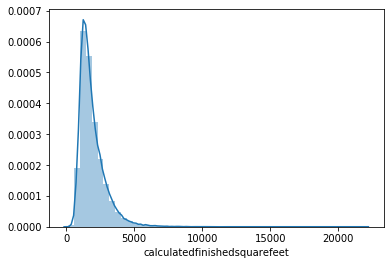

In [22]:
sns.distplot(df.calculatedfinishedsquarefeet.dropna())
plt.show()

In [23]:
df.calculatedfinishedsquarefeet.describe()

count    52211.000000
mean      1922.401984
std       1000.864812
min        128.000000
25%       1268.000000
50%       1659.000000
75%       2305.000000
max      21929.000000
Name: calculatedfinishedsquarefeet, dtype: float64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52292 entries, 77578 to 0
Data columns (total 18 columns):
parcelid                        52292 non-null int64
bathroomcnt                     52292 non-null float64
bedroomcnt                      52292 non-null int64
calculatedfinishedsquarefeet    52211 non-null float64
fips                            52292 non-null int64
latitude                        52292 non-null int64
longitude                       52292 non-null int64
lotsizesquarefeet               51930 non-null float64
regionidcity                    51256 non-null float64
roomcnt                         52292 non-null int64
yearbuilt                       52178 non-null float64
structuretaxvaluedollarcnt      52213 non-null float64
taxvaluedollarcnt               52291 non-null float64
landtaxvaluedollarcnt           52291 non-null float64
taxamount                       52288 non-null float64
id.1                            52292 non-null int64
logerror                 

In [25]:
df.calculatedfinishedsquarefeet.median()

1659.0

In [26]:
df.calculatedfinishedsquarefeet.mean()

1922.4019842561913

In [27]:
df.structuretaxvaluedollarcnt.median()

131883.0

In [28]:
df.structuretaxvaluedollarcnt.mean()

196592.61356367188

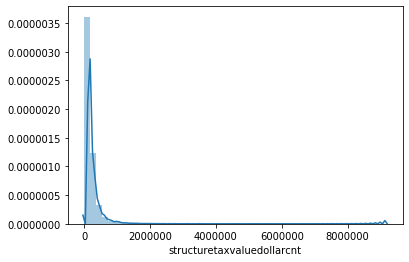

In [29]:
sns.distplot(df.structuretaxvaluedollarcnt.dropna())
plt.show()

In [30]:
df.isnull().sum()

parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedfinishedsquarefeet      81
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet                362
regionidcity                    1036
roomcnt                            0
yearbuilt                        114
structuretaxvaluedollarcnt        79
taxvaluedollarcnt                  1
landtaxvaluedollarcnt              1
taxamount                          4
id.1                               0
logerror                           0
transactiondate                    0
dtype: int64

After exploring distributions and summary stats for calculatedfininshedsquarefeet and structuretaxvaluedollarcnt, removed rows with nulls. Also, for other catergories, removed rows with minimal nulls.

In [31]:
df.dropna(axis=0,subset=["calculatedfinishedsquarefeet","structuretaxvaluedollarcnt",
                         "taxvaluedollarcnt","landtaxvaluedollarcnt","taxamount"], inplace=True)

In [32]:
df.isnull().sum()

parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedfinishedsquarefeet       0
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet                340
regionidcity                    1026
roomcnt                            0
yearbuilt                         38
structuretaxvaluedollarcnt         0
taxvaluedollarcnt                  0
landtaxvaluedollarcnt              0
taxamount                          0
id.1                               0
logerror                           0
transactiondate                    0
dtype: int64

In [33]:
df.dropna(axis=0,subset=["yearbuilt"], inplace=True)

In [34]:
df.isnull().sum()

parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedfinishedsquarefeet       0
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet                340
regionidcity                    1020
roomcnt                            0
yearbuilt                          0
structuretaxvaluedollarcnt         0
taxvaluedollarcnt                  0
landtaxvaluedollarcnt              0
taxamount                          0
id.1                               0
logerror                           0
transactiondate                    0
dtype: int64

Explore lot size and the nulls

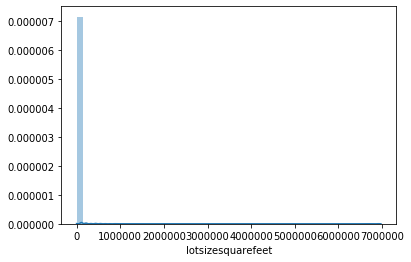

In [35]:
sns.distplot(df.lotsizesquarefeet.dropna())

In [36]:
df.lotsizesquarefeet.value_counts(dropna=False, bins=15)

(-6734.775000000001, 464954.267]    51719
(464954.267, 929672.533]               28
(6506291.733, 6971010.0]                7
(929672.533, 1394390.8]                 3
(1394390.8, 1859109.067]                2
(2788545.6, 3253263.867]                1
(2323827.333, 2788545.6]                1
(6041573.467, 6506291.733]              0
(5576855.2, 6041573.467]                0
(5112136.933, 5576855.2]                0
(4647418.667, 5112136.933]              0
(4182700.4, 4647418.667]                0
(3717982.133, 4182700.4]                0
(3253263.867, 3717982.133]              0
(1859109.067, 2323827.333]              0
Name: lotsizesquarefeet, dtype: int64

In [37]:
df.shape

(52101, 18)

In [38]:
# df["totallotvalue"] = df.landtaxvaluedollarcnt + df.structuretaxvaluedollarcnt

In [39]:
# (df.totallotvalue != df.taxvaluedollarcnt).sum()

total value column is unnecessary as it equals the the taxvaluedollarcnt

In [41]:
# df["proportionlotandvalue"] = df.lotsizesquarefeet.dropna() / df.taxvaluedollarcnt

In [42]:
# df.proportionlotandvalue.describe()

Take the mean of proportions less that 1

In [43]:
# mean_proportion = df [df.proportionlotandvalue < 1].proportionlotandvalue.mean()
# mean_proportion

In [44]:
# df_subset = df[["lotsizesquarefeet","totallotvalue"]]

In [45]:
# df_subset["mean"] = mean_proportion

In [46]:
# df_subset.head()

Fill the lot size nulls with the previous calculated mean

In [47]:
# df_subset.lotsizesquarefeet.fillna(df_subset.totallotvalue * df_subset["mean"], inplace=True)

In [48]:
# df_subset.isnull().sum()

In [49]:
# df_subset.head()

In [50]:
# df.head()

Replace lot size column with newly created non-null column

In [51]:
# df.lotsizesquarefeet = df_subset.lotsizesquarefeet

In [52]:
# df.isnull().sum()

create function with imputing lot size after split

In [53]:
# df.drop(columns=["regionidcity", "totallotvalue","proportionlotandvalue"],inplace=True)

In [54]:
# df.isnull().sum()

Remove roomcount because too many zero values

In [55]:
df.roomcnt.value_counts()

0     37588
6      3966
7      3598
8      2805
5      1879
9      1172
4       515
10      338
11      105
3        74
12       34
13       10
2        10
14        5
15        1
1         1
Name: roomcnt, dtype: int64

In [56]:
df.drop(columns=["parcelid","roomcnt"], inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52101 entries, 77578 to 0
Data columns (total 16 columns):
bathroomcnt                     52101 non-null float64
bedroomcnt                      52101 non-null int64
calculatedfinishedsquarefeet    52101 non-null float64
fips                            52101 non-null int64
latitude                        52101 non-null int64
longitude                       52101 non-null int64
lotsizesquarefeet               51761 non-null float64
regionidcity                    51081 non-null float64
yearbuilt                       52101 non-null float64
structuretaxvaluedollarcnt      52101 non-null float64
taxvaluedollarcnt               52101 non-null float64
landtaxvaluedollarcnt           52101 non-null float64
taxamount                       52101 non-null float64
id.1                            52101 non-null int64
logerror                        52101 non-null float64
transactiondate                 52101 non-null object
dtypes: float64(10), i

Rename columns to things more relevant

In [58]:
df.rename(columns={"calculatedfinishedsquarefeet":"house_area","fips":"countyid","structuretaxvaluedollarcnt":"house_value", 
                   "taxvaluedollarcnt":"whole_value","landtaxvaluedollarcnt":"land_value","lotsizesquarefeet":"whole_area"}, 
          inplace=True)

In [59]:
df.shape

(52101, 16)

In [60]:
df.head()

,bathroomcnt,bedroomcnt,house_area,countyid,latitude,longitude,whole_area,regionidcity,yearbuilt,house_value,whole_value,land_value,taxamount,id.1,logerror,transactiondate
77578,2.0,3,1762.0,6037,33937685,-117996709,6347.0,14634.0,1955.0,140000.0,522000.0,382000.0,6317.15,77612,0.007204,2017-09-25
77577,1.0,3,1032.0,6037,34040895,-118038169,5074.0,36502.0,1954.0,32797.0,49546.0,16749.0,876.43,77611,0.037129,2017-09-21
77576,2.0,4,1612.0,6111,34300140,-118706327,12105.0,27110.0,1964.0,50683.0,67205.0,16522.0,1107.48,77610,0.013209,2017-09-21
77575,2.0,2,1286.0,6037,34245368,-118282383,47405.0,12447.0,1940.0,70917.0,354621.0,283704.0,4478.43,77609,0.020615,2017-09-20
77394,2.0,3,1518.0,6037,33983643,-118362294,5799.0,116042.0,1948.0,116897.0,229242.0,112345.0,3277.29,77428,0.023168,2017-09-19


In [69]:
df.drop(columns="regionidcity", inplace=True)

In [74]:
df.drop(columns="id.1", inplace=True)

In [75]:
train, test = split_scale.split_my_data(df, .80)

In [76]:
train, test = prep.impute_lotsize_nulls(train, test)

In [77]:
train = prep.feature_eng(train)
test = prep.feature_eng(test)

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41680 entries, 28235 to 54472
Data columns (total 15 columns):
bathroomcnt        41680 non-null float64
bedroomcnt         41680 non-null int64
house_area         41680 non-null float64
countyid           41680 non-null int64
latitude           41680 non-null int64
longitude          41680 non-null int64
whole_area         41680 non-null float64
yearbuilt          41680 non-null float64
house_value        41680 non-null float64
whole_value        41680 non-null float64
land_value         41680 non-null float64
taxamount          41680 non-null float64
logerror           41680 non-null float64
transactiondate    41680 non-null object
land_area          41680 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 6.3+ MB


### Explore

In [84]:
features = list(train.columns)
features_num = list(df.select_dtypes(np.number).columns)
features_obj = list(df.select_dtypes(exclude=np.number).columns)

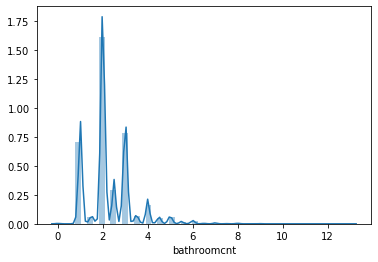

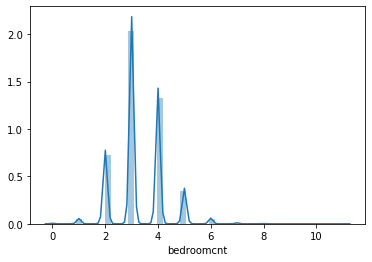

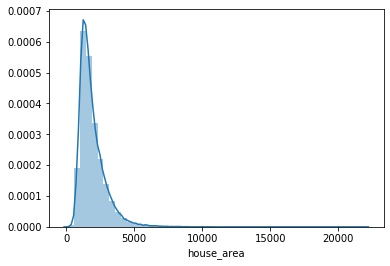

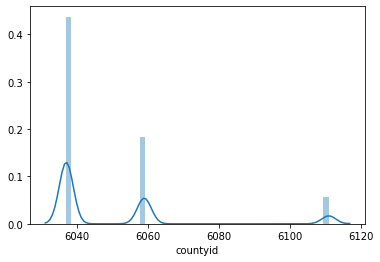

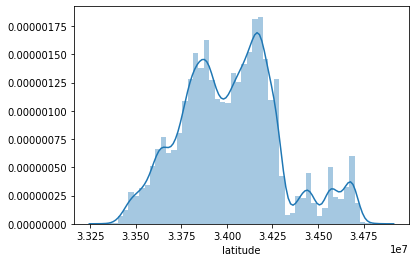

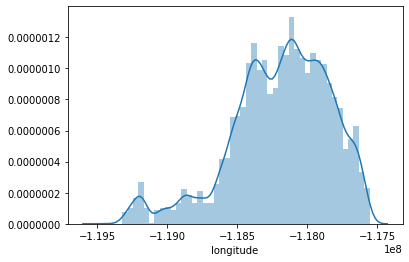

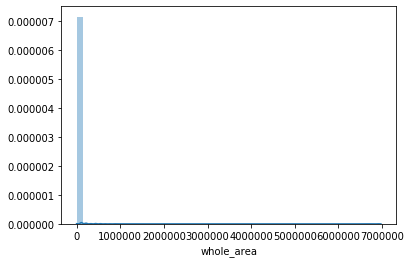

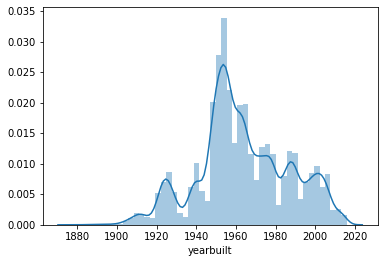

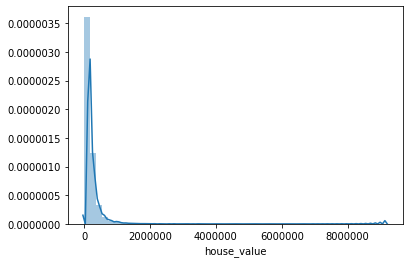

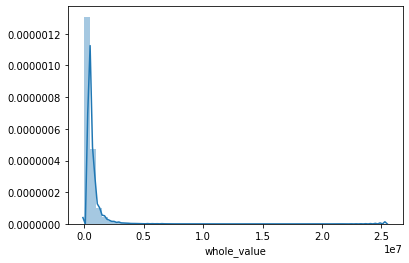

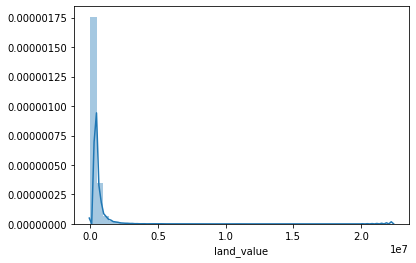

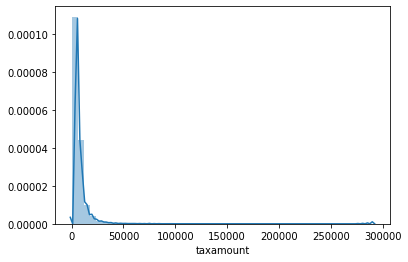

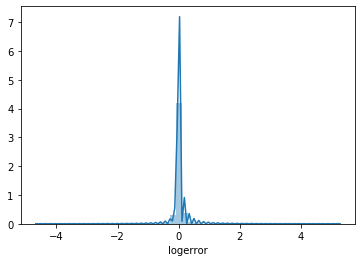

In [85]:
for feature in features_num:
    sns.distplot(df[feature].dropna())
    plt.show()

In [91]:
for col in train.columns:
    print(f'{col}:')
    if train[col].dtype == 'object':
        col_count = train[col].value_counts()
    else:
        if train[col].nunique() >= 25:
            col_count = train[col].value_counts(bins=10, sort=False)
        else:
            col_count = train[col].value_counts()
    print(col_count.sort_values(ascending=False))

bathroomcnt:
2.0     17401
3.0      8472
1.0      7639
2.5      3138
4.0      1808
3.5       733
1.5       675
5.0       635
4.5       534
6.0       252
5.5       188
7.0        70
8.0        39
6.5        37
0.0        28
7.5        13
9.0        10
10.0        3
11.0        2
8.5         2
13.0        1
Name: bathroomcnt, dtype: int64
bedroomcnt:
3     18606
4     12129
2      6655
5      3181
6       497
1       464
7        81
0        42
8        18
9         5
10        2
Name: bedroomcnt, dtype: int64
house_area:
(106.198, 2308.1]     31269
(2308.1, 4488.2]       9457
(4488.2, 6668.3]        790
(6668.3, 8848.4]        119
(8848.4, 11028.5]        31
(11028.5, 13208.6]        9
(19748.9, 21929.0]        2
(15388.7, 17568.8]        2
(13208.6, 15388.7]        1
(17568.8, 19748.9]        0
Name: house_area, dtype: int64
countyid:
6037    26935
6059    11286
6111     3459
Name: countyid, dtype: int64
latitude:
(34079693.5, 34227508.2]      9859
(33784064.1, 33931878.8]      8734
(3